In [1]:
%reset -f
from pythonrc import *

# Simple test

## Setup the environment and the configuration

In [2]:


def initialize_allocator(
    allocator_type: skadipy.allocator.AllocatorBase, **kwargs
) -> skadipy.allocator.AllocatorBase:
    return allocator_type(
        actuators=[
            tunnel,
            voithschneider_port,
            voithschneider_starboard
        ],
        force_torque_components=[
            skadipy.allocator.ForceTorqueComponent.X,
            skadipy.allocator.ForceTorqueComponent.Y,
            skadipy.allocator.ForceTorqueComponent.N,
        ],
        **kwargs,
    )

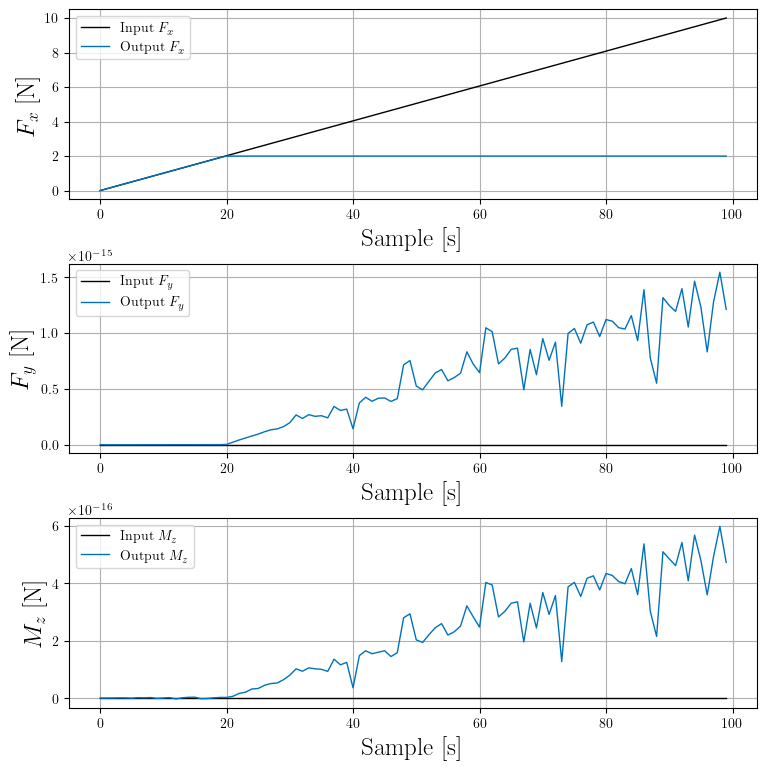

In [3]:
n = 100
tau_cmd = np.linspace((0, 0, 0, 0, 0, 0), (10, 0, 0, 0, 0, 0), n)
xi_hist, _, tau_hist = run_tests(
    tau_cmd, allocators=[initialize_allocator(mc.allocator.QuadraticProgramming)]
)
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

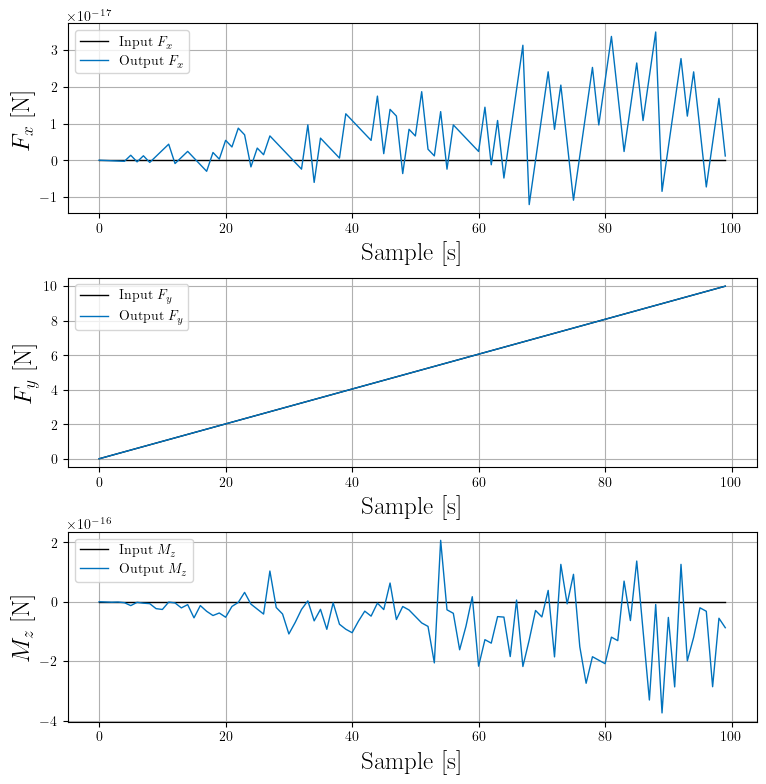

In [4]:
n = 100
tau_cmd = np.linspace(
    (0,   0, 0, 0, 0, 0),
    (0,  10, 0, 0, 0, 0),
    n
)

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=[initialize_allocator(mc.allocator.PseudoInverse)])
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

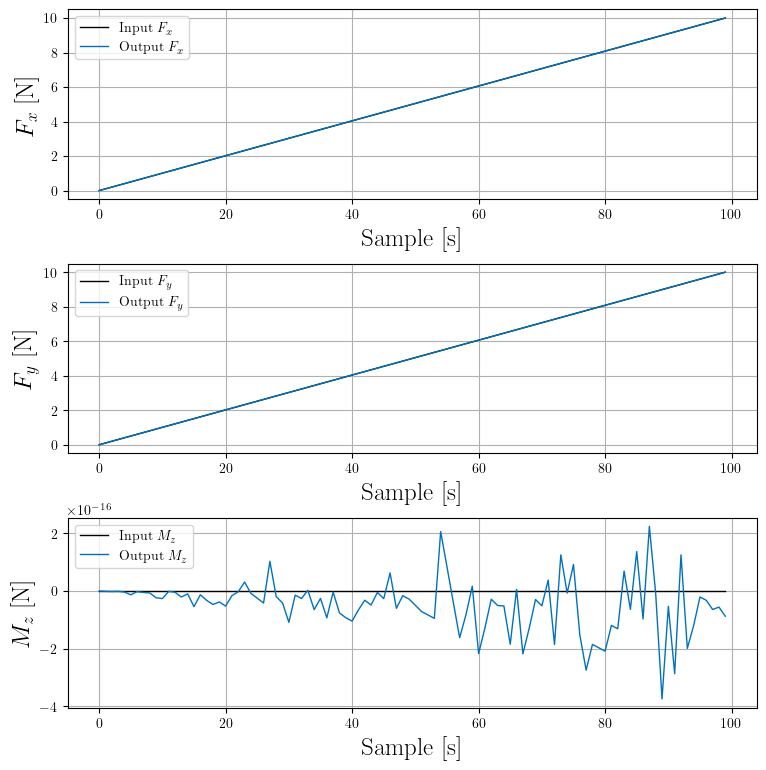

In [5]:
n = 100
tau_cmd = np.linspace(
    (0,   0, 0, 0, 0, 0),
    (10, 10, 0, 0, 0, 0),
    n
)

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=[initialize_allocator(mc.allocator.PseudoInverse)])
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

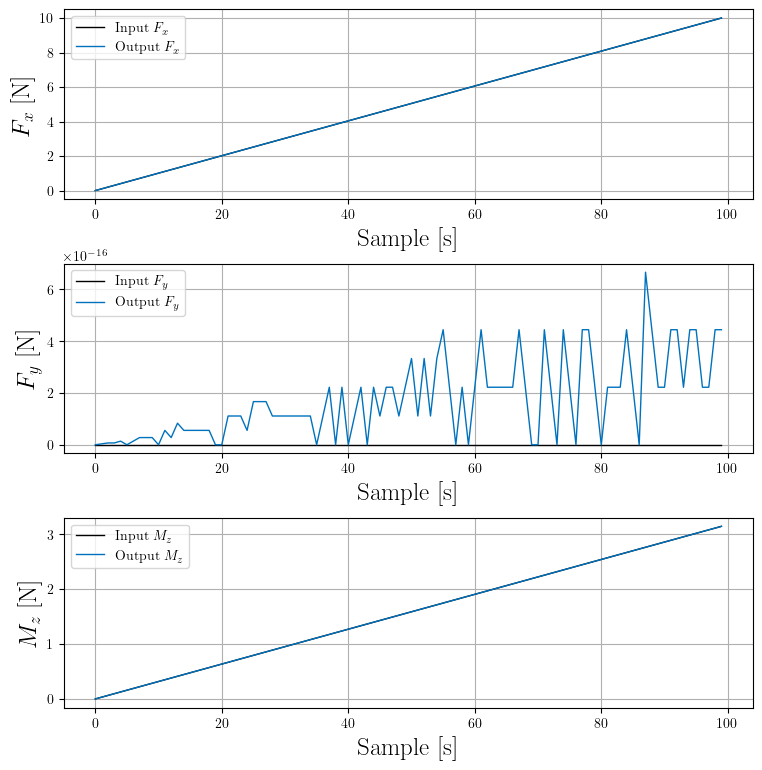

In [6]:
n = 100
tau_cmd = np.linspace(
    (0,   0, 0, 0, 0, 0),
    (10,  0, 0, 0, 0, np.pi),
    n
)
xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=[initialize_allocator(mc.allocator.PseudoInverse)])
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)